## Car Price Case Study

Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market

Essentially, the company wants —

To identify the variables which are significant in predicting the price of a car.

To create a linear model that quantitatively relates car prices with variables.

To know the accuracy of the model, i.e. how well these variables can predict car prices.


### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the car dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()
#Info confirms that there is no null data exists 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

Splitting the car name and company name from one column into 2 columns.

In [7]:
carsD = cars['CarName'].str.split(" ",n=1,expand=True)
cars['CompanyName'] = carsD[0]
cars['CarsName'] = carsD[1]

In [8]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CompanyName', 'CarsName'],
      dtype='object')

In [9]:
#Dropping the CarName column
cars = cars.drop(['CarName'],axis=1)

In [10]:
cars.shape

(205, 27)

In [11]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#There are spelling mistakes in the company name. Correcting the mistakes
cars.CompanyName = cars.CompanyName.str.lower()

def renameStringValue(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

renameStringValue('toyouta','toyota')
renameStringValue('porcshce','porsche')
renameStringValue('vw','volkswagen')
renameStringValue('vokswagen','volkswagen')
renameStringValue('maxda','mazda')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Visualization 
### Ploting categorical values using boxplot

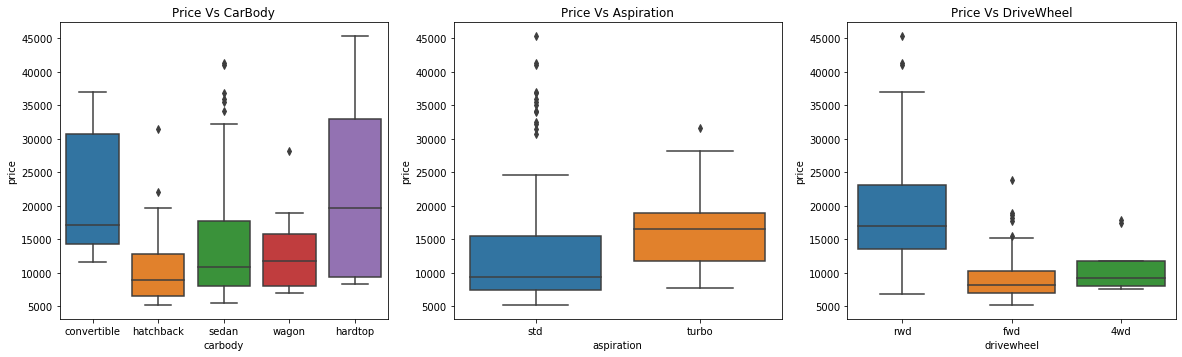

In [13]:
plot.figure(figsize=(20, 12))
plot.subplot(2,3,1)
plot.title('Price Vs CarBody')
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plot.subplot(2,3,2)
plot.title('Price Vs Aspiration')
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plot.subplot(2,3,3)
plot.title('Price Vs DriveWheel')
sns.boxplot(x = 'drivewheel', y = 'price', data = cars )

"Price VS CarBody" : Convertible and Hardtop is highly distributed with Price

"Price VS Aspiration" : std price distribution between 5000 to 15000 which has outliers above 25000

"Price VS Drivewheel": drivewheel rwd price is widely distributed in the range above 18000 to less than 25000

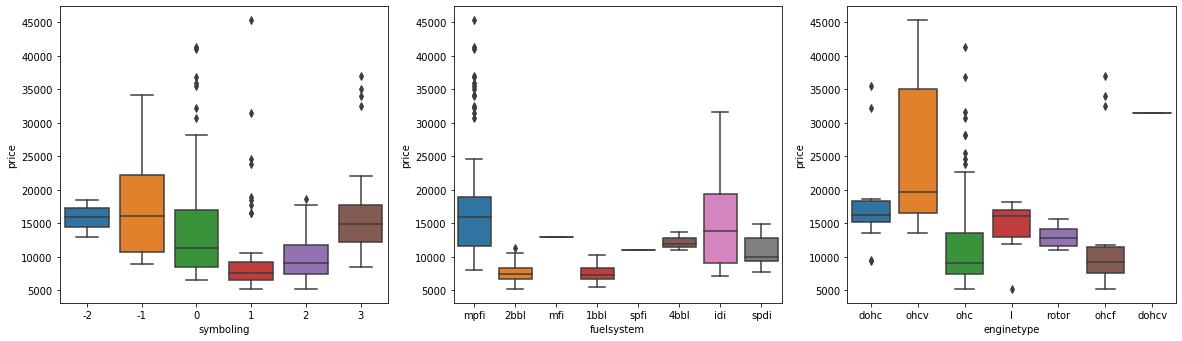

In [14]:
plot.figure(figsize=(20, 12))

plot.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cars)
plot.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plot.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)

"Price VS Symboling" : Convertible and Hardtop is highly distributed with Price

"Price VS fuelsystem" : std price distribution between 5000 to 15000 which has outliers above 25000

"Price VS enginetype" : ohcv engine type is distributed widely with the price range

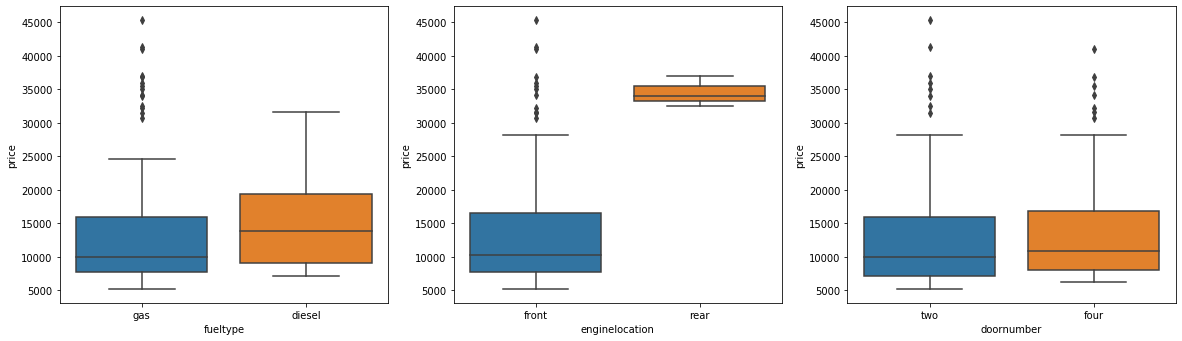

In [15]:
plot.figure(figsize=(20, 12))

plot.subplot(2,3,4)
sns.boxplot(x = 'fueltype', y ='price', data = cars)
plot.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plot.subplot(2,3,6)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)

"Price VS fueltype" : Diesel is highly distributed with Price 

"Price VS enginelocation" : front engine price is distributed widely in low and medium budget, rear engine price distributed in high range

"Price VS doornumber" : ohcv engine type is distributed widely with the price range

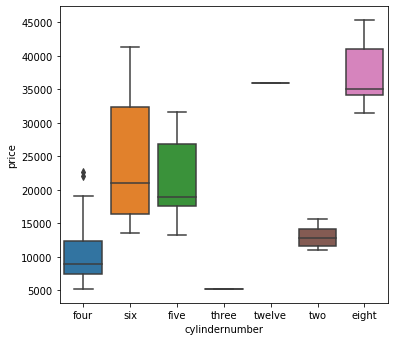

In [16]:
plot.figure(figsize=(20, 12))

plot.subplot(2,3,1)
sns.boxplot(x = 'cylindernumber', y ='price', data = cars)


[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car company')]

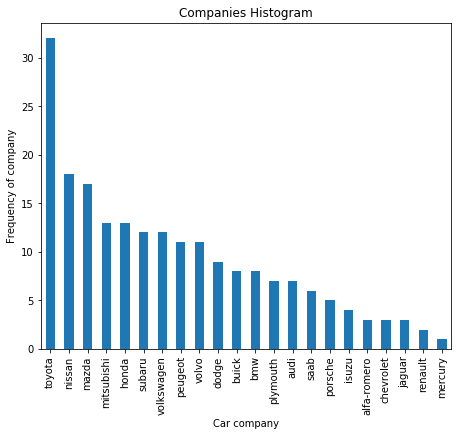

In [17]:
plot.figure(figsize=(25,6))

plot.subplot(1,3,1)
plot.title('Companies Histogram')
plt1 = cars.CompanyName.value_counts().plot('bar')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

Plotting the company name against Average Price

Text(0.5, 1.0, 'Company Name vs Average Price')

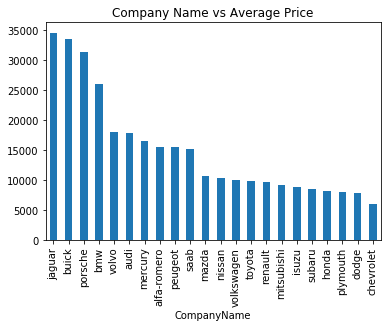

In [18]:
car =(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
car.plot.bar()
plot.title('Company Name vs Average Price')


Company Name Vs Average Price bar plot shows range of variation as 
1. Highend
2. moderate
3. low end cars

In [19]:
#Binning the price with Company range

cars['price'] = cars['price'].astype('int')
carsd = cars.copy()
companyNameGroup = carsd.groupby(['CompanyName'])['price'].mean()
companyNameGroup = carsd.merge(companyNameGroup.reset_index(), how='left',on='CompanyName')
bins = [0,15000,30000,45000]
cars_bin=['LowEnd','Medium','Highend']
cars['carsrange'] = pd.cut(companyNameGroup['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,CarsName,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,giulia,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,stelvio,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,Quadrifoglio,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,100 ls,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,100ls,Medium


Text(0.5, 1.0, 'Company Name vs Average Price')

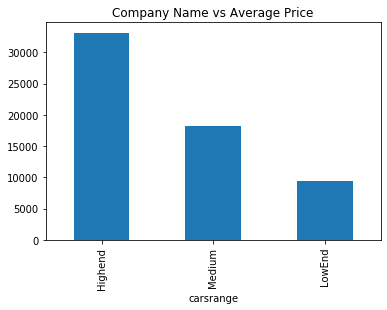

In [20]:
car =(cars.groupby(['carsrange'])['price'].mean().sort_values(ascending = False))
car.plot.bar()
plot.title('Company Name vs Average Price')

### Plotting the Numerical values using Scatter plot


In [21]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName', 'CarsName', 'carsrange'],
      dtype='object')

Text(0.5, 0, 'stroke')

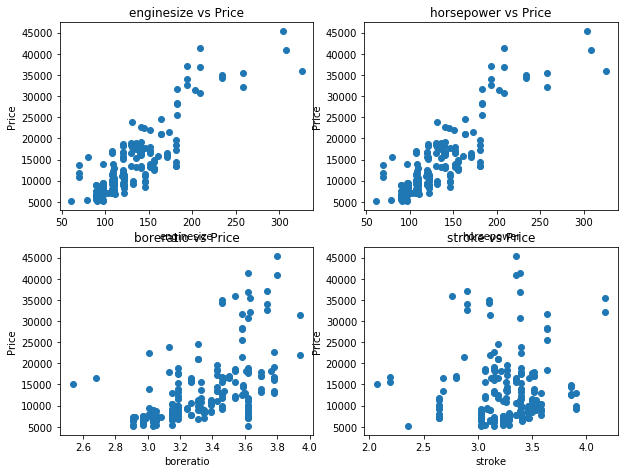

In [22]:
plot.figure(figsize=(10,20))
plot.subplot(5,2,1)
plot.scatter(cars['enginesize'],cars['price'])
plot.title('enginesize vs Price')
plot.ylabel('Price')
plot.xlabel('enginesize')

plot.subplot(5,2,2)
plot.scatter(cars['enginesize'],cars['price'])
plot.title('horsepower vs Price')
plot.ylabel('Price')
plot.xlabel('horsepower')

plot.subplot(5,2,3)
plot.scatter(cars['boreratio'],cars['price'])
plot.title('boreratio vs Price')
plot.ylabel('Price')
plot.xlabel('boreratio')

plot.subplot(5,2,4)
plot.scatter(cars['stroke'],cars['price'])
plot.title('stroke vs Price')
plot.ylabel('Price')
plot.xlabel('stroke')

1. EngineSize, Boreratio and horsepower shows some positive correlation with price.
2. Stoke is not significant with respect to price

Text(0.5, 0, 'highwaympg')

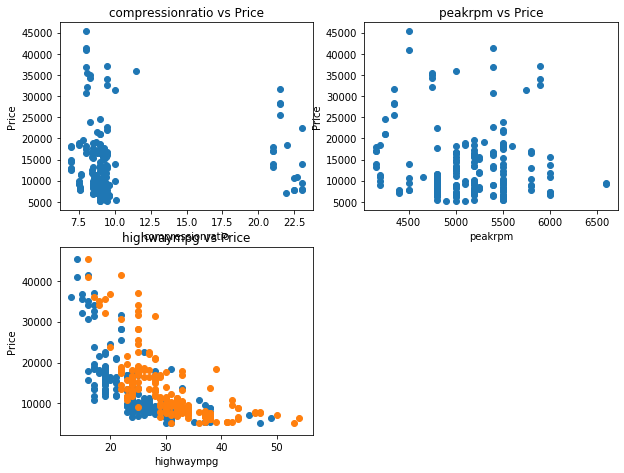

In [23]:
plot.figure(figsize=(10,20))

plot.subplot(5,2,1)
plot.scatter(cars['compressionratio'],cars['price'])
plot.title('compressionratio vs Price')
plot.ylabel('Price')
plot.xlabel('compressionratio') 

plot.subplot(5,2,2)
plot.scatter(cars['peakrpm'],cars['price'])
plot.title('peakrpm vs Price')
plot.ylabel('Price')
plot.xlabel('peakrpm')

plot.subplot(5,2,3)
plot.scatter(cars['citympg'],cars['price'])
plot.title('citympg vs Price')
plot.ylabel('Price')
plot.xlabel('citympg')

plot.subplot(5,2,3)
plot.scatter(cars['highwaympg'],cars['price'])
plot.title('highwaympg vs Price')
plot.ylabel('Price')
plot.xlabel('highwaympg')

1. Citympg and Highwaympg shows negative correlation with price which is significant for the model.
2. Compression ratio and peakpm seems not correlated with price. 

Text(0.5, 0, 'carlength')

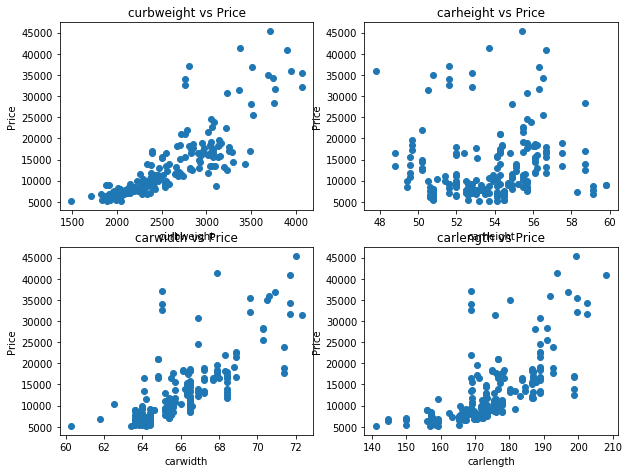

In [24]:
plot.figure(figsize=(10,20))
plot.subplot(5,2,1)
plot.scatter(cars['curbweight'],cars['price'])
plot.title('curbweight vs Price')
plot.ylabel('Price')
plot.xlabel('curbweight')

plot.subplot(5,2,2)
plot.scatter(cars['carheight'],cars['price'])
plot.title('carheight vs Price')
plot.ylabel('Price')
plot.xlabel('carheight')

plot.subplot(5,2,3)
plot.scatter(cars['carwidth'],cars['price'])
plot.title('carwidth vs Price')
plot.ylabel('Price')
plot.xlabel('carwidth')

plot.subplot(5,2,4)
plot.scatter(cars['carlength'],cars['price'])
plot.title('carlength vs Price')
plot.ylabel('Price')
plot.xlabel('carlength')

1. Car Width, length and curbweigth shows positive correlation with price
2. Carheight is not correlated with price.

Based on above visual analysis there are some non significant predictors for price. Dropping the in significant columns.
1. carheight
2. compressionratio
3. peakpm
4. stroke


In [25]:
cars = cars.drop(['carheight','compressionratio','peakrpm','stroke'],axis=1)

### Creating dummy variables

In [26]:
modelColumns = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginelocation','fuelsystem',
                      'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','carsrange']]

In [27]:
modelColumns.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginelocation,fuelsystem,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,front,mpfi,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,front,mpfi,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,front,mpfi,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,front,mpfi,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,front,mpfi,ohc,five,136,3.19,115,176.6,66.4,Medium


In [28]:
cardata = pd.get_dummies(modelColumns['fueltype'])
modelColumns = pd.concat([modelColumns, cardata], axis = 1)
cardata1 = pd.get_dummies(modelColumns['aspiration'])
modelColumns = pd.concat([modelColumns, cardata1], axis = 1)
cardata2 = pd.get_dummies(modelColumns['carbody'])
modelColumns = pd.concat([modelColumns, cardata2], axis = 1)
cardata3 = pd.get_dummies(modelColumns['enginelocation'])
modelColumns = pd.concat([modelColumns, cardata3], axis = 1)
cardata4 = pd.get_dummies(modelColumns['fuelsystem'])
modelColumns = pd.concat([modelColumns, cardata4], axis = 1)
cardata5 = pd.get_dummies(modelColumns['enginetype'])
modelColumns = pd.concat([modelColumns, cardata5], axis = 1)
cardata6 = pd.get_dummies(modelColumns['carsrange'])
modelColumns = pd.concat([modelColumns, cardata6], axis = 1)
cardata7 = pd.get_dummies(modelColumns['cylindernumber'])
modelColumns = pd.concat([modelColumns, cardata7], axis = 1)

In [29]:
modelColumns.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginelocation,fuelsystem,enginetype,...,LowEnd,Medium,Highend,eight,five,four,six,three,twelve,two
0,13495,gas,std,convertible,rwd,88.6,2548,front,mpfi,dohc,...,0,1,0,0,0,1,0,0,0,0
1,16500,gas,std,convertible,rwd,88.6,2548,front,mpfi,dohc,...,0,1,0,0,0,1,0,0,0,0
2,16500,gas,std,hatchback,rwd,94.5,2823,front,mpfi,ohcv,...,0,1,0,0,0,0,1,0,0,0
3,13950,gas,std,sedan,fwd,99.8,2337,front,mpfi,ohc,...,0,1,0,0,0,1,0,0,0,0
4,17450,gas,std,sedan,4wd,99.4,2824,front,mpfi,ohc,...,0,1,0,0,1,0,0,0,0,0


In [30]:
carData = modelColumns.copy()

In [31]:
#Dropping the categorical varibles

carData = carData.drop(['fueltype','aspiration','carbody','drivewheel','cylindernumber',
                        'fuelsystem','enginelocation','enginetype','carsrange'],axis=1)

In [32]:
#Dropping insignificant columns based on the categorical plot 
carData = carData.drop(['three','twelve','mfi','spfi','dohcv'],axis=1)

In [33]:
carData.shape

(205, 39)

### Splitting the Data into Training and Testing Set

In [34]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(carData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,ohcv,rotor,LowEnd,Medium,Highend,eight,five,four,six,two
122,7609,93.7,2191,98,2.97,68,167.3,63.8,0,1,...,0,0,1,0,0,0,0,1,0,0
125,22018,94.5,2778,151,3.94,143,168.9,68.3,0,1,...,0,0,0,0,1,0,0,1,0,0
166,9538,94.5,2300,98,3.24,112,168.7,64.0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,1,0,0,0,1,0,0
199,18950,104.3,3157,130,3.62,162,188.8,67.2,0,1,...,0,0,0,1,0,0,0,1,0,0


In [36]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,ohcv,rotor,LowEnd,Medium,Highend,eight,five,four,six,two
160,7738,95.7,2094,98,3.19,70,166.3,64.4,0,1,...,0,0,1,0,0,0,0,1,0,0
186,8495,97.3,2275,109,3.19,85,171.7,65.5,0,1,...,0,0,1,0,0,0,0,1,0,0
59,8845,98.8,2385,122,3.39,84,177.8,66.5,0,1,...,0,0,1,0,0,0,0,1,0,0
165,9298,94.5,2265,98,3.24,112,168.7,64.0,0,1,...,0,0,1,0,0,0,0,1,0,0
140,7603,93.3,2240,108,3.62,73,157.3,63.8,0,1,...,0,0,1,0,0,0,0,1,0,0


### Rescaling the Features using min-max Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,...,ohcv,rotor,LowEnd,Medium,Highend,eight,five,four,six,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.090909,0.909091,...,0.062937,0.027972,0.706294,0.216783,0.076923,0.020979,0.062937,0.741259,0.132867,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.288490,...,0.243703,0.165472,0.457060,0.413502,0.267406,0.143818,0.243703,0.439483,0.340624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


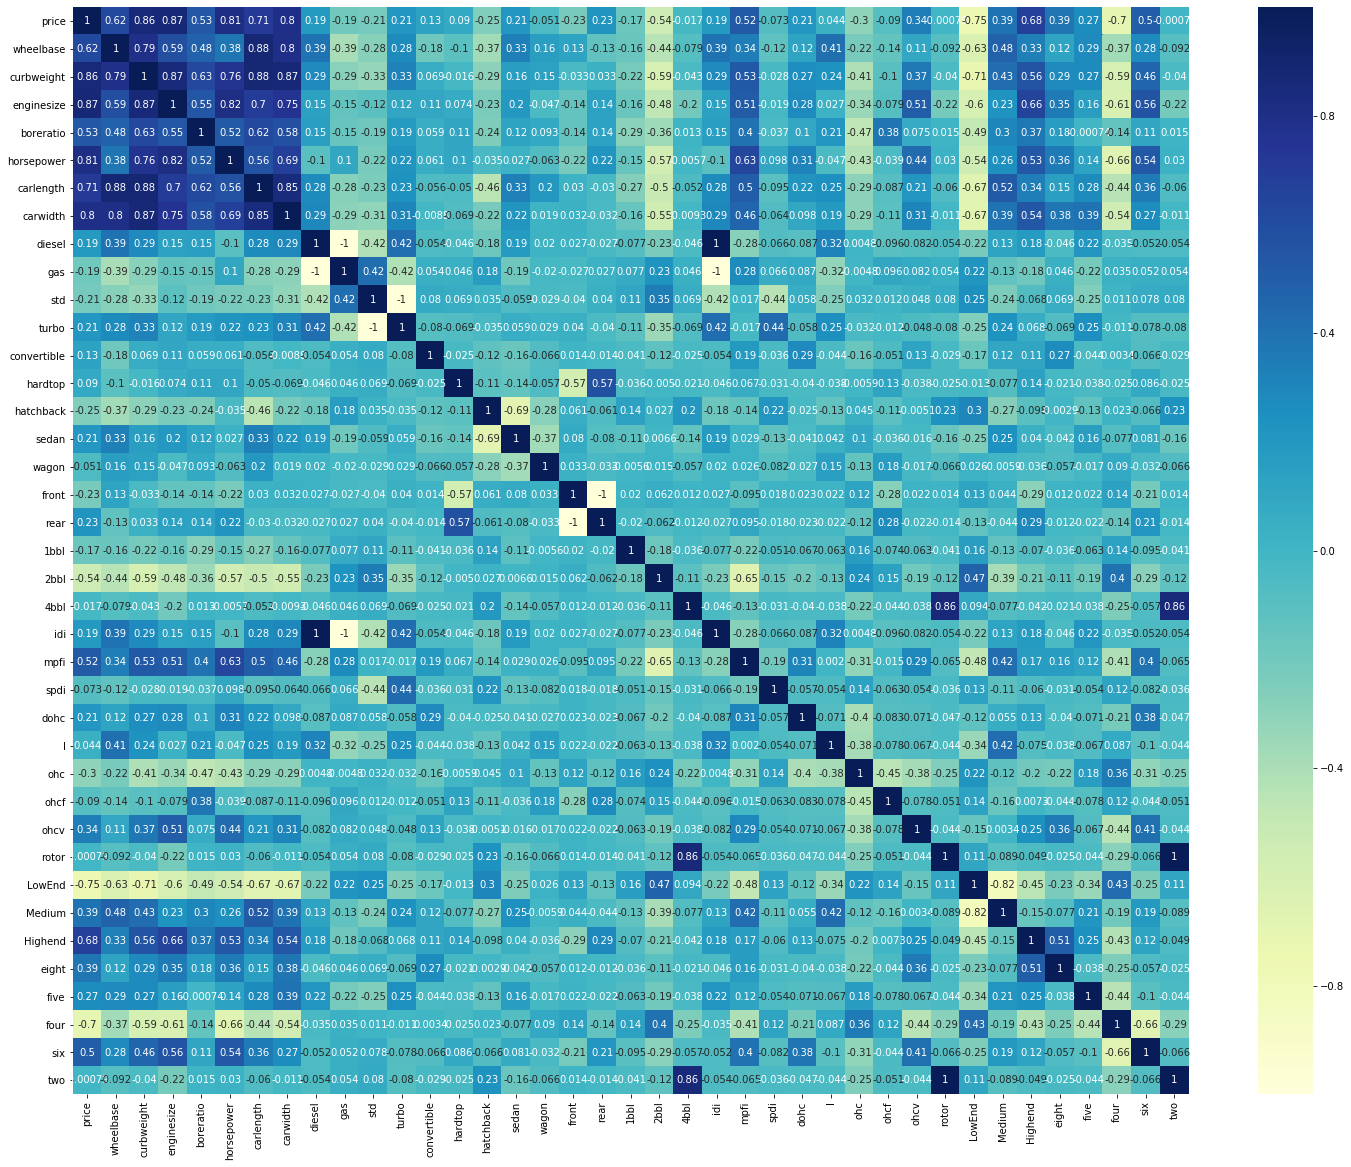

In [40]:
# HeatMap to check correlation coefficients for the variables which are highly correlated

plot.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plot.show()

## Build Models

#### Divide X and Y set to build the model

In [41]:
y_train = df_train.pop('price')
X_train = df_train

In [42]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,diesel,gas,std,...,ohcv,rotor,LowEnd,Medium,Highend,eight,five,four,six,two
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,0,1,1,...,0,0,1,0,0,0,0,1,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,0,1,1,...,0,0,0,0,1,0,0,1,0,0
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,0,1,1,...,0,0,0,1,0,0,0,1,0,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [43]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

#### Model building using using the LinearRegression function from SciKit Learn
### RFE (Recursive Feature Elimination)

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 10),
 ('curbweight', True, 1),
 ('enginesize', False, 3),
 ('boreratio', False, 19),
 ('horsepower', True, 1),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('diesel', False, 16),
 ('gas', False, 20),
 ('std', False, 29),
 ('turbo', False, 28),
 ('convertible', True, 1),
 ('hardtop', False, 21),
 ('hatchback', False, 17),
 ('sedan', False, 24),
 ('wagon', False, 23),
 ('front', True, 1),
 ('rear', False, 14),
 ('1bbl', False, 26),
 ('2bbl', False, 22),
 ('4bbl', False, 18),
 ('idi', False, 11),
 ('mpfi', False, 27),
 ('spdi', False, 13),
 ('dohc', False, 6),
 ('l', False, 5),
 ('ohc', True, 1),
 ('ohcf', False, 2),
 ('ohcv', False, 8),
 ('rotor', False, 7),
 ('LowEnd', True, 1),
 ('Medium', False, 25),
 ('Highend', True, 1),
 ('eight', False, 9),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 15),
 ('two', False, 4)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'horsepower', 'carwidth', 'convertible', 'front', 'ohc',
       'LowEnd', 'Highend', 'five', 'four'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'boreratio', 'carlength', 'diesel', 'gas',
       'std', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rear',
       '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi', 'dohc', 'l', 'ohcf',
       'ohcv', 'rotor', 'Medium', 'eight', 'six', 'two'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [49]:
import statsmodels.api as sm

### Model 1

In [50]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)  # adding constant

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.26e-67
Time:                        08:22:01   Log-Likelihood:                 197.31
No. Observations:                 143   AIC:                            -372.6
Df Residuals:                     132   BIC:                            -340.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3235      0.073      4.410      

### Model 2

In [53]:
#Drop convertible and build new Model
X_train_new = X_train_rfe.drop(["convertible"], axis = 1)

In [54]:
X_train_rfe1 = sm.add_constant(X_train_new) 

In [55]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [56]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.69e-67
Time:                        08:22:01   Log-Likelihood:                 193.58
No. Observations:                 143   AIC:                            -367.2
Df Residuals:                     133   BIC:                            -337.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3209      0.075      4.278      0.0

### Model 3

In [57]:
#Drop carwidth and build new Model
X_train_new1 = X_train_new.drop(["carwidth"], axis = 1)

In [58]:
X_train_rfe2 = sm.add_constant(X_train_new1) 

In [59]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [60]:
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.61e-67
Time:                        08:22:01   Log-Likelihood:                 190.52
No. Observations:                 143   AIC:                            -363.0
Df Residuals:                     134   BIC:                            -336.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3101      0.076      4.069      0.0

### Model 4

In [61]:
#Drop front and build new Model
X_train_new2 = X_train_new1.drop(["front"], axis = 1)

In [62]:
X_train_rfe3 = sm.add_constant(X_train_new2)

In [63]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [64]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.17e-67
Time:                        08:22:01   Log-Likelihood:                 187.98
No. Observations:                 143   AIC:                            -360.0
Df Residuals:                     135   BIC:                            -336.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1646      0.039      4.270      0.0


R-sqaured = 0.090  - 90% of variance is explained.

Adj. R-squared  = 0.904 

### VIF calculation for Model 4

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Calculating VIF for the above Model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.47
1,curbweight,3.75
2,horsepower,3.24
7,four,2.48
4,LowEnd,2.17
6,five,1.69
5,Highend,1.55
3,ohc,1.50


In [67]:
#Constants VIF is higher than 10. Dropping the const
X_train_new3 = X_train_new2.drop(['const'], axis=1)

In [68]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,11.11
1,horsepower,8.35
6,four,6.47
2,ohc,4.39
3,LowEnd,3.99
5,five,1.69
4,Highend,1.67


In [69]:
#Constants VIF is higher than 10. Dropping the curbweight
X_train_new4 = X_train_new3.drop(['curbweight'], axis=1)

In [70]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,four,5.16
1,ohc,4.38
2,LowEnd,3.92
0,horsepower,2.27
3,Highend,1.63
4,five,1.51


#### Above features VIF are significant and it is within acceptable range.

### Model 5

#### Building the model based on significant VIF

In [71]:
X_train_rfe4 = sm.add_constant(X_train_new4)

In [72]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [73]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.48e-59
Time:                        08:22:01   Log-Likelihood:                 167.30
No. Observations:                 143   AIC:                            -320.6
Df Residuals:                     136   BIC:                            -299.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3237      0.035      9.239      0.0

#### Model 5 seems to be pretty good with respect to R-squared, adj R-squared, p-value and VIF

87% variance is explained. 

R-squared : 0.878

adj. R-squared : 0.873

p-values for all the coefficients seems to be 0.00 and 0.02 which means that all the predictors are statistically significant.


### Residual Analysis of the train data

In [74]:
y_train_price = lm4.predict(X_train_rfe4)

In [75]:
%matplotlib inline

Text(0.5, 0, 'Errors')

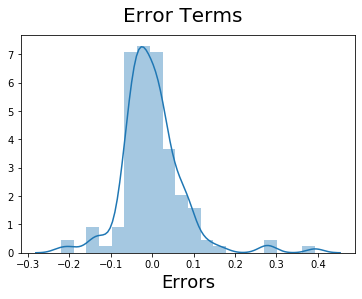

In [76]:
# Plot the histogram of the error terms
fig = plot.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plot.xlabel('Errors', fontsize = 18)                         # X-label

###### Errors are normally distributed

## Applying Prediction

##### Apply Scaling to the test data 

In [77]:
num_vars = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
y_test = df_test.pop('price')
X_test = df_test

In [79]:
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [80]:
y_pred = lm4.predict(X_test_new)

In [81]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print('r_square_value :',r_squared)

r_square_value : 0.8794073917565969


### r_square_value : 0.8794073917565969

### Plotting the Test Prediction

Text(0, 0.5, 'y_pred')

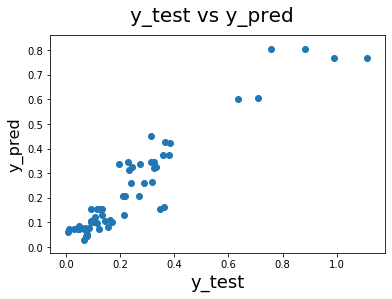

In [82]:
fig = plot.figure()
plot.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plot.xlabel('y_test', fontsize=18)                          # X-label
plot.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ price = 0.4151  \times  horsepower + 0.0512  \times  ohc -0.1926  \times LowEnd + 0.2073\times highend -0.1093 \times 5 engines -0.1442 \times 4 engines $

Overall above model looks decent.

#### Thanks